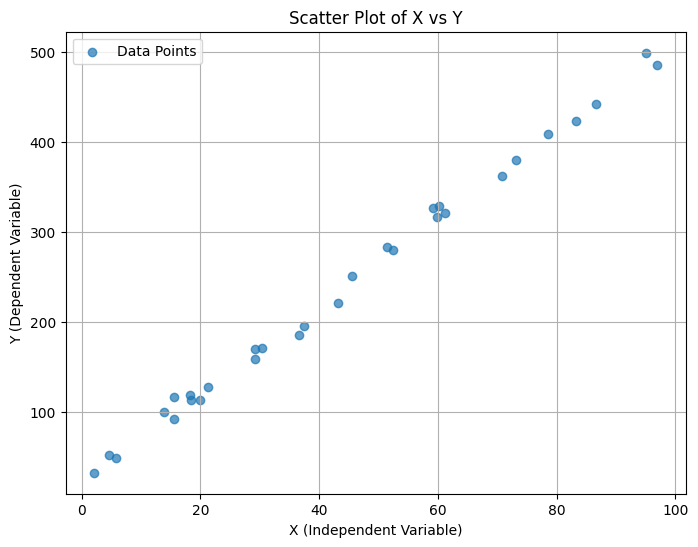

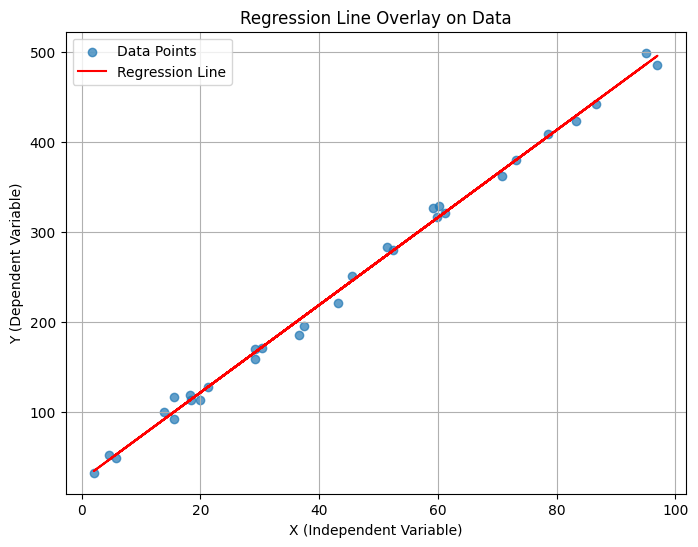

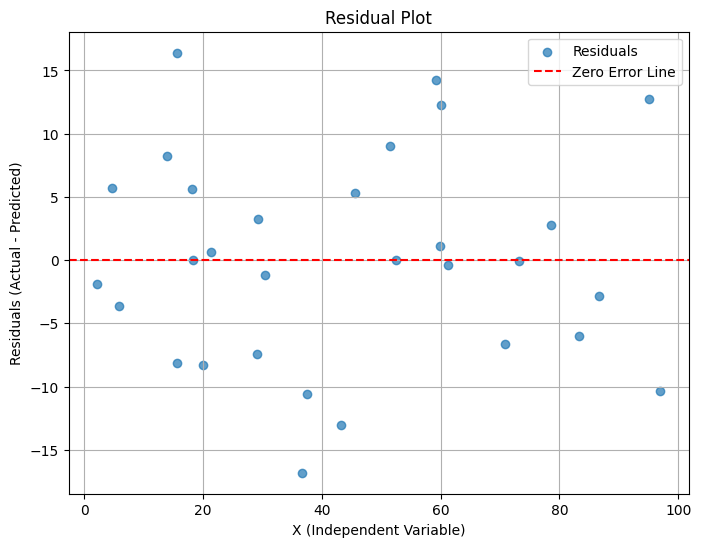

Slope (m): 4.861
Intercept (c): 24.290
R²: 0.996
Mean Absolute Error (MAE): 6.487
Mean Squared Error (MSE): 67.166
Root Mean Squared Error (RMSE): 8.196


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Regenerate Synthetic Dataset
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 100, 30)  # Independent variable
noise = np.random.normal(0, 10, X.shape)  # Add some noise
Y = 5 * X + 20 + noise  # Dependent variable (linear relationship with noise)
dataset = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Data Visualization
plt.figure(figsize=(8, 6))
plt.scatter(dataset['X'], dataset['Y'], alpha=0.7, label='Data Points')
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid()
plt.show()

# Step 3: Linear Regression Implementation
X = dataset[['X']].values
Y = dataset['Y'].values

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

# Step 4: Coefficient of Determination (R²)
predicted_Y = model.predict(X)
r2 = r2_score(Y, predicted_Y)

# Step 5: Predictions and Visualization
plt.figure(figsize=(8, 6))
plt.scatter(dataset['X'], dataset['Y'], alpha=0.7, label='Data Points')
plt.plot(dataset['X'], predicted_Y, color='red', label='Regression Line')
plt.title('Regression Line Overlay on Data')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid()
plt.show()

# Step 6: Residual Analysis
residuals = Y - predicted_Y
plt.figure(figsize=(8, 6))
plt.scatter(dataset['X'], residuals, alpha=0.7, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid()
plt.show()

# Step 7: Model Evaluation Metrics
mae = mean_absolute_error(Y, predicted_Y)
mse = mean_squared_error(Y, predicted_Y)
rmse = np.sqrt(mse)

# Print Results
results = {
    "Slope (m)": slope,
    "Intercept (c)": intercept,
    "R²": r2,
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse
}

for key, value in results.items():
    print(f"{key}: {value:.3f}")

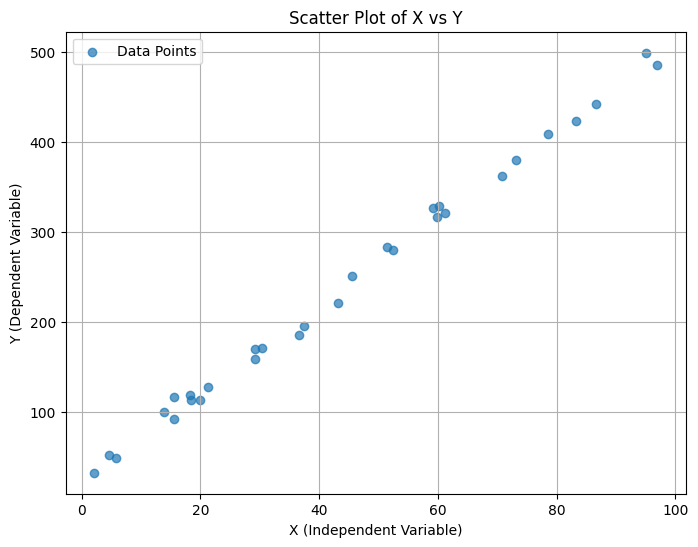

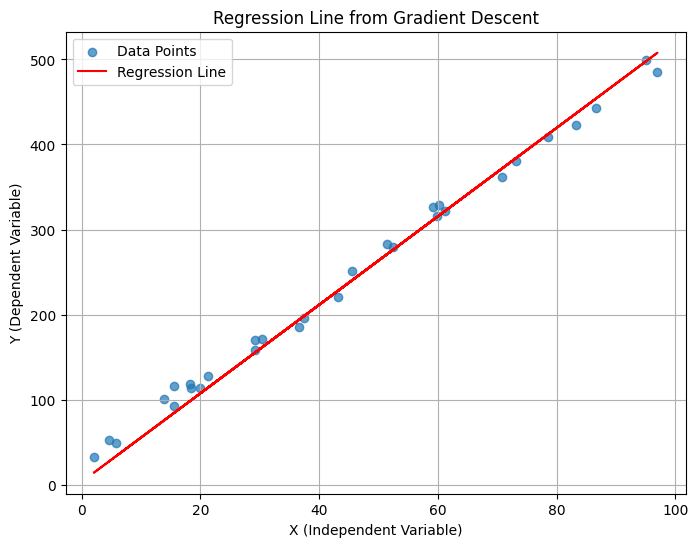

Theta0 (Intercept): 3.311198001564402
Theta1 (Slope): 5.20218954784934
Final Cost (MSE): 96.54097401518683
Mean Absolute Error (MAE): 11.480326346954957
Mean Squared Error (MSE): 193.08194803037367
Root Mean Squared Error (RMSE): 13.895393050589597
R²: 0.989438691787125


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Dataset Preparation
np.random.seed(42)
X = np.random.uniform(0, 100, 30)  # Independent variable
noise = np.random.normal(0, 10, X.shape)  # Add noise
Y = 5 * X + 20 + noise  # Dependent variable (linear relationship with noise)

# Step 2: Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.7, label="Data Points")
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.legend()
plt.grid()
plt.show()

# Step 3: Define Mean Squared Error (MSE) as the Cost Function
def compute_cost(X, Y, theta0, theta1):
    m = len(Y)
    predictions = theta0 + theta1 * X
    errors = predictions - Y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

# Step 4: Gradient Descent Implementation
def gradient_descent(X, Y, theta0, theta1, alpha, iterations):
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        predictions = theta0 + theta1 * X
        errors = predictions - Y
        # Compute gradients
        grad_theta0 = (1 / m) * np.sum(errors)
        grad_theta1 = (1 / m) * np.sum(errors * X)
        # Update parameters
        theta0 -= alpha * grad_theta0
        theta1 -= alpha * grad_theta1
        # Store the cost
        cost_history.append(compute_cost(X, Y, theta0, theta1))

    return theta0, theta1, cost_history

# Initialize parameters
theta0_initial = 0  # Intercept
theta1_initial = 0  # Slope
alpha = 0.0005  # Learning rate
iterations = 1000  # Number of iterations

# Perform Gradient Descent
theta0, theta1, cost_history = gradient_descent(X, Y, theta0_initial, theta1_initial, alpha, iterations)

# Step 5: Predictions and Regression Line Visualization
predicted_Y = theta0 + theta1 * X
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.7, label="Data Points")
plt.plot(X, predicted_Y, color="red", label="Regression Line")
plt.title("Regression Line from Gradient Descent")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.legend()
plt.grid()
plt.show()

# Step 6: Model Evaluation
mae = np.mean(np.abs(Y - predicted_Y))
mse = np.mean((Y - predicted_Y)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((Y - predicted_Y)**2) / np.sum((Y - np.mean(Y))**2))

# Print Results
print("Theta0 (Intercept):", theta0)
print("Theta1 (Slope):", theta1)
print("Final Cost (MSE):", cost_history[-1])
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R²:", r2)